> ### EEE3314: Introduction to Artificial Intelligence

# Assignment III:  Neural Networks

### *Assignement Instructions:*
- **Due date**: 11 PM, Dec. 23, 2023
- **File name**: [ID_Name_HW3.ipynb]
- Write a program implementing a particular algorithm to solve a given problem.   
- **Analyze the algorithm, theoretically and empirically. Report and discuss your results.**

### *Collaboration policy:*
- You may discuss the questions with your friends, but each student writes their own codes and answers.  
- **Cheating is strictly prohibited, and will be considered academic dishonesty. This is not how you want to start your career as an engineer.**
We expect that most students can distinguish between helping other students and cheating. Explaining the meaning of a question or discussing a way of approaching a solution is an interaction. But you should write your homework solution strictly by your so that your hands and eyes can help you internalize the subject matter. You should acknowledge everyone whom you have worked with, or who has given you any significant ideas about the homework.
- Signiture: <span style="color:blue">[2019142015] [LeeChangYeon]</span>

In [222]:
import datetime
print("This code is written at " + str(datetime.datetime.now()))

This code is written at 2023-12-23 19:19:38.056323


In [223]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Problem statement

We will implement a simple neural network for classification. Let's first see how a simple logistic regression method works on the $\text{moon}$ dataset. This dataset has been widely used to evaluate performance of a nonlinear classifier or clustering methods. We can synthetically generate the dataset with labels from the $\texttt{sklearn.linear_model}$. See the example shown below. 

In [224]:
from project3 import *

In [225]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split

plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['font.size'] = 16

In [226]:
# dataset
np.random.seed(0)
X_train, y_train = sklearn.datasets.make_moons(300, noise = 0.25)

Let's viaualize the $\texttt{moon}$ dataset with the $\texttt{scatter}$ function from $\texttt{matplotlib.pyplot}$.

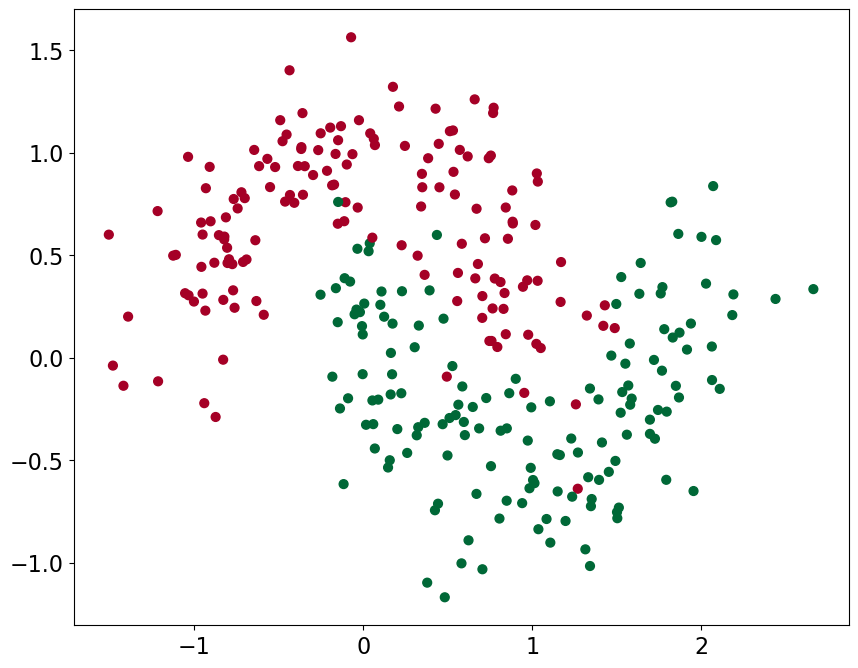

In [227]:
plt.scatter(X_train[:,0], X_train[:,1], s = 40, c=y_train, cmap=plt.cm.RdYlGn)

It is impossible to classify samples in the dataset using linear classifiers such as a logistic regression method. That is, drawing a straight line (i.e., decision boundaries) to divide training samples into two different regions is not feasible. 

The $\texttt{sklearn.linear_model}$ provides a set of linear models. See the following webpage: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html. 

In [228]:
import sklearn.linear_model

Let's apply logistic regression to the $\texttt{moon}$ dataset and draw decision boundaries. You can use the help function ($\texttt{plot_decision_boundary}$) that takes three values (or functions) as inputs. $\texttt{pred_func}$ is an output of the classifiers, e.g., the output value of the sigmoid function in case of logistic regression. Other two arguments, $\texttt{train_data}$ and $\texttt{color}$, are the training dataset and color for each label in the dataset, respectively. See the example below.

In [229]:
# logistic regression
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X_train, y_train)

LogisticRegressionCV()

Text(0.5, 1.0, 'Logistic Regression')

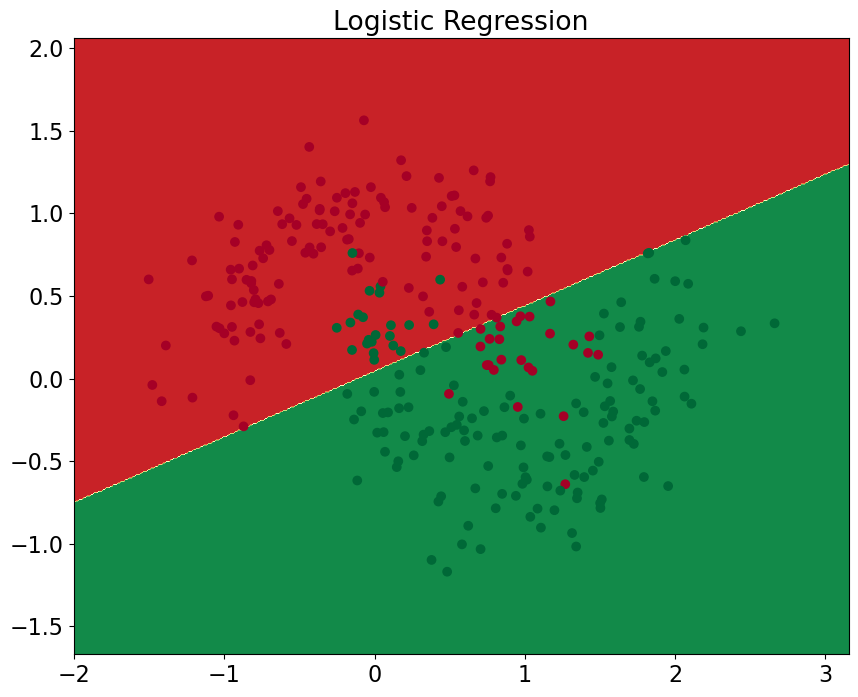

In [230]:
# plot boundary
plot_decision_boundary(pred_func=clf.predict, train_data = X_train, color = y_train)
plt.title("Logistic Regression")

In [231]:
print(f"X_train.shape: {X_train.shape}")
print(f"y_train.shape: {y_train.shape}")

X_train.shape: (300, 2)
y_train.shape: (300,)


As you can see, we should exploit nonlinear classifiers to classify such datasets. Let's implement a nonlinear classifier with a simple neural network, and apply it to classify samples in the $\texttt{moon}$ dataset. The neural network we will implement consists of series of fully connected layers followed by nonlinear activation functions. 

### P1. Implement neural networks (Flat implementation) (50 points)
Implement a multilayer perceptron method (```class NeuralNetwork```) using gradient descent. A detailed description of the nework is shown below. Plot a decision boundary on the $\texttt{moon}$ dataset. Plot training losses and training accuracy over the number of epochs. 

 > $H_1 = X \cdot W_1 + b_1$   
 > $z_1 = ReLU(H_1)$ where $ReLU$($=\max(0,x)$) is a rectified linear unit and $z_1$ is an output of the first hidden layer.  
 > $H_2 = z_1 \cdot W_2 + b_2$   
 > $z_2 = tanh(H_2)$ where $\tanh$ is a tanh function and $z_2$ is an output of the second hidden layer.    
 > $H_3 = z_2 \cdot W_3 + b_3$   
 > $\hat y = \sigma(H_3)$ where $\sigma$ is a sigmoid function unit and $\hat y$ is an output of the network.
 
 
Note that sigmoid function is typically used for binary classification to obtain scores of $[0,1]$. 
 
 > **$W$** and **$b$** are weights and bias, respectively.    
 > **Initialization for weight**: Standard normal (use $\texttt{np.random.randn}$.)  
 > **Initialization for bias (intercept)**: 0     
 > **Input size**: 2  
 > **The first hidden layer size**: 10  
 > **The second hidden layer size**: 10  
 > **Output size**: 1   
 > **Regularization parameter $\lambda$**: 0.001  
 > **Loss function**: Binary cross entropy loss (or equivently log loss). For each training sample, we define a log loss function as follows:
 >
 > $L = -y\log \hat{y} -(1-y)\log(1-\hat{y})$
 >
 > where $y$ is a ground truth that has the value of 0 or 1.   
 > **Total loss** : summation of the losses for the entire training samples and L2 normalized weights for regularization, as follows:
 >
 > $L_{total} = \sum_{i=1}^N{ (-y^{(i)}\log \hat{y}^{(i)} -(1-y^{(i)})\log(1-\hat{y}^{(i)})) } +  \lambda \|W\|^2 $  
 >
 > where $y^{(i)}$ and $\hat{y}^{(i)}$ are the ground truth and the output of the network of i-th sample respectively.  
 > **Optimization**: Gradient descent  
 > **Learning rate** = 0.001  
 > **Number of epochs** = 50000

### P2. Implement neural networks (Modular implementation) (30 points)

Implement ```class Linear```, ```class ReLU```, ```class Tanh```, ```class Sigmoid``` and ```class NeuralNetwork_module```.

We will implement a multilayer perceptron method with modular functions, similar to the generic deep learning libraries such as `PyTorch` and `TensorFlow`.  To perform classification using ```class NeuralNetwork_module```, we define `forward` and `backward` operations for each layer (e.g., ReLU, a linear layer (i.e., y=Wx), Tanh, or a sigmoid layer), whose inputs and ouputs are matrices. Note that a linear layer (```Linear``` class) also inputs an additinal weight matrix. Note also that we should chche data needed for a backward pass in `forward` operations.


Please see the description for `forward` and `backward` operations in the linear layer (```class Linear```) below.
```python
class Layer(Object):
    @staticmethod
    def forward(x):
      """ Receive inputs x and weights w """
      # Do some computations ...
      z = # ... some intermediate value
      # Do some more computations ...
      out = # the output

      cache = (x, out) # Values we need to compute gradients

      return out, cache

    @staticmethod
    def backward(dout, cache):
      """
      Receive dout (derivative of loss with respect to outputs) and cache,
      and compute derivative with respect to inputs.
      """
      # Unpack cache values
      x, out = cache
    
      # Use values in cache to compute derivatives
      dx = # Derivative of loss with respect to x
     
      return dx
```




### P1

In [232]:
np.random.seed(0)

nn_input_dim = 2
nn_output_dim = 1
nn_hdim1 = 10
nn_hdim2 = 10
lr = 0.001 
L2_norm = 0.001
epoch = 50000

model = NeuralNetwork(nn_input_dim, nn_hdim1, nn_hdim2, nn_output_dim, init="random")
stats = model.train(X_train, y_train, learning_rate=lr, L2_norm=L2_norm, epoch=epoch, print_loss=True)

Loss (epoch 1000): 28.893687548275675
Loss (epoch 2000): 25.905837983011956
Loss (epoch 3000): 22.942622847714475
Loss (epoch 4000): 21.036259285013852
Loss (epoch 5000): 19.589216947091003
Loss (epoch 6000): 18.21720250068335
Loss (epoch 7000): 17.399884031285875
Loss (epoch 8000): 16.992910927728452
Loss (epoch 9000): 16.741359789145445
Loss (epoch 10000): 15.229006526409307
Loss (epoch 11000): 13.84821221368718
Loss (epoch 12000): 12.941499428869175
Loss (epoch 13000): 12.633740154232843
Loss (epoch 14000): 11.991624423731484
Loss (epoch 15000): 11.541305722402305
Loss (epoch 16000): 10.985029058992966
Loss (epoch 17000): 10.798319625118749
Loss (epoch 18000): 10.066090489731183
Loss (epoch 19000): 9.650512263783808
Loss (epoch 20000): 9.379339547904438
Loss (epoch 21000): 9.176700217597457
Loss (epoch 22000): 8.960021344796386
Loss (epoch 23000): 8.607570538310252
Loss (epoch 24000): 8.175100093901909
Loss (epoch 25000): 10.020323549851476
Loss (epoch 26000): 7.414864542355847
Loss

Text(0.5, 1.0, 'Decision Boundary: Hidden layer dimension (10, 10)')

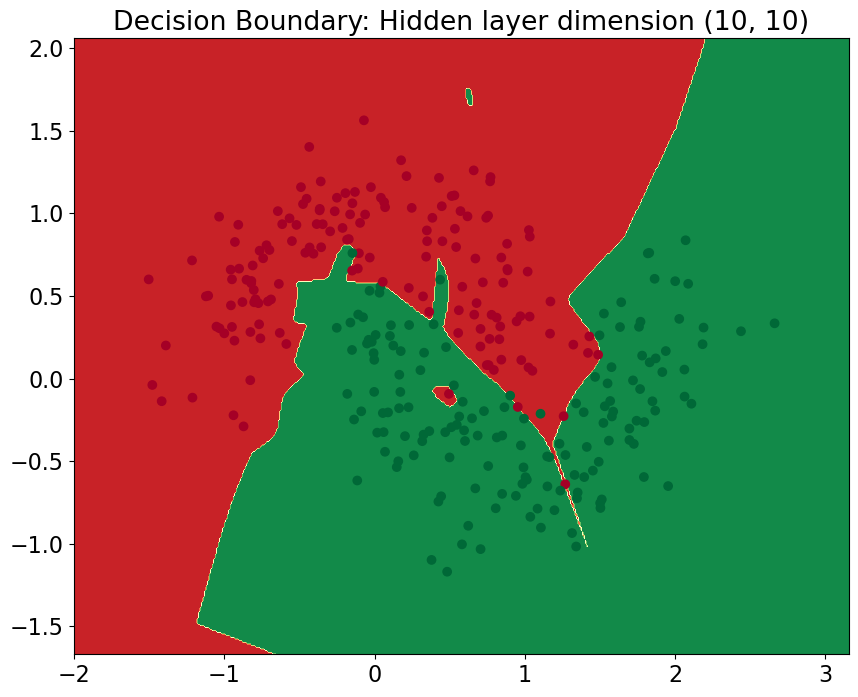

In [233]:
# Plot the decision boundary
plot_decision_boundary(lambda x: model.predict(x), X_train, y_train)
plt.title(f"Decision Boundary: Hidden layer dimension {nn_hdim1, nn_hdim2}")

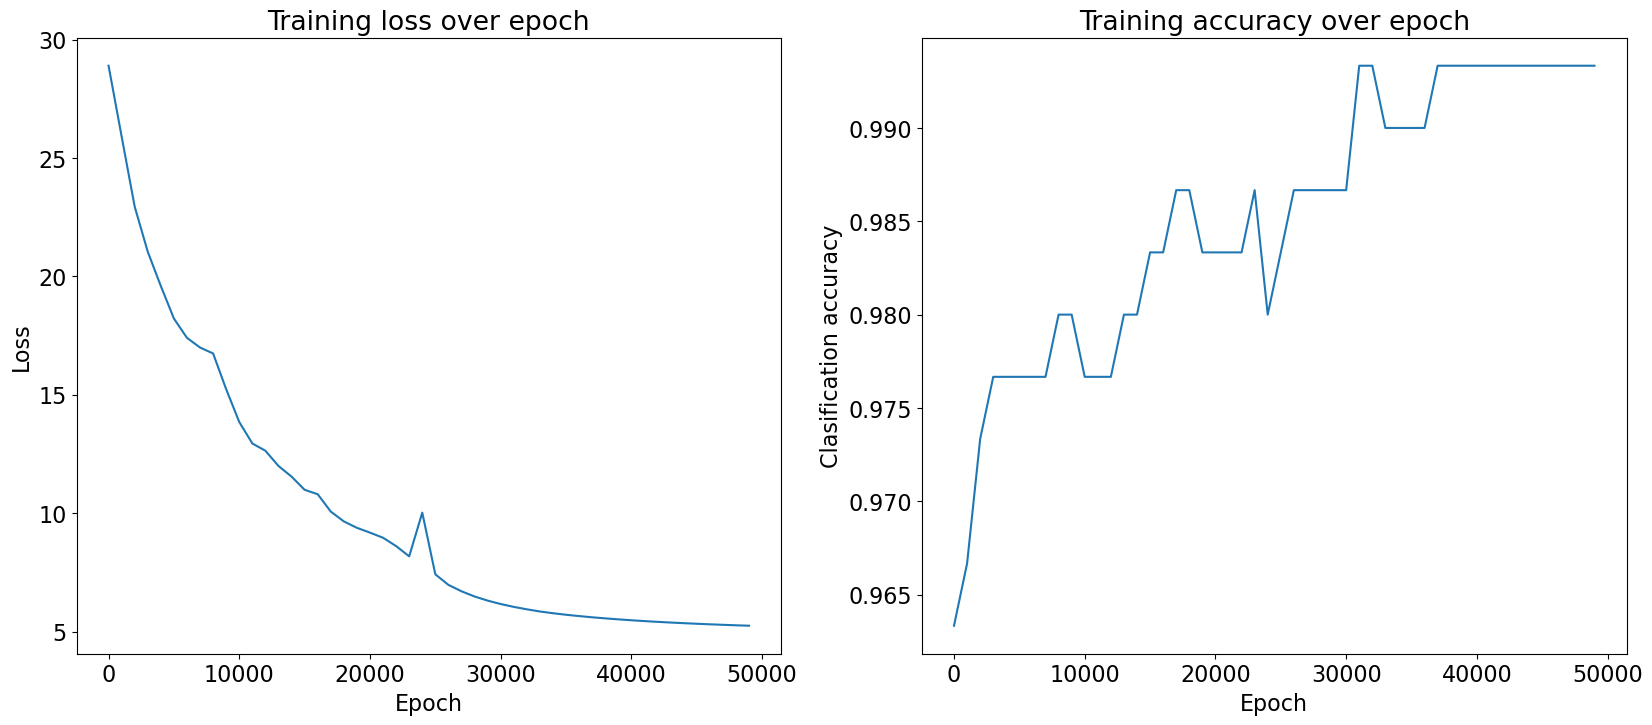

In [234]:
plt.subplot(1, 2, 1)
plt.plot(np.arange(len(stats['loss_history'])) * 1000, stats['loss_history'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training loss over epoch')
plt.subplot(1, 2, 2)
plt.plot(np.arange(len(stats['train_acc_history'])) * 1000, stats['train_acc_history'])
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.title('Training accuracy over epoch')
plt.gcf().set_size_inches(20, 8)

### P2

In [246]:
np.random.seed(0)

nn_input_dim = 2
nn_output_dim = 1
nn_hdim1 = 10
nn_hdim2 = 10
lr = 0.001 
L2_norm = 0.001
epoch = 50000

model = NeuralNetwork_module(nn_input_dim, nn_hdim1, nn_hdim2, nn_output_dim, init="random")
stats = model.train(X_train, y_train, learning_rate=lr, L2_norm=L2_norm, epoch=epoch, print_loss=True)

Loss (epoch 1): 298.8243726566291
Loss (epoch 2): 219.31425361512493
Loss (epoch 3): 185.55680454720368
Loss (epoch 4): 169.25729273443372
Loss (epoch 5): 159.00496249687833
Loss (epoch 6): 151.4524459200978
Loss (epoch 7): 145.34441064885155
Loss (epoch 8): 140.12486481256587
Loss (epoch 9): 135.43710742930267
Loss (epoch 10): 131.12879752276044
Loss (epoch 11): 127.16875870752837
Loss (epoch 1000): 36.609271745928076
Loss (epoch 2000): 33.53500916641161
Loss (epoch 3000): 29.275273095725282
Loss (epoch 4000): 26.47196901567236
Loss (epoch 5000): 24.35215256638869
Loss (epoch 6000): 22.43997114475594
Loss (epoch 7000): 21.394513709964325
Loss (epoch 8000): 21.168518380749784
Loss (epoch 9000): 21.159360397889248
Loss (epoch 10000): 19.400893386618137
Loss (epoch 11000): 17.878426204211188
Loss (epoch 12000): 16.706334699333336
Loss (epoch 13000): 16.506890844774205
Loss (epoch 14000): 15.670709032458303
Loss (epoch 15000): 15.17957162454338
Loss (epoch 16000): 14.43880641352665
Loss (

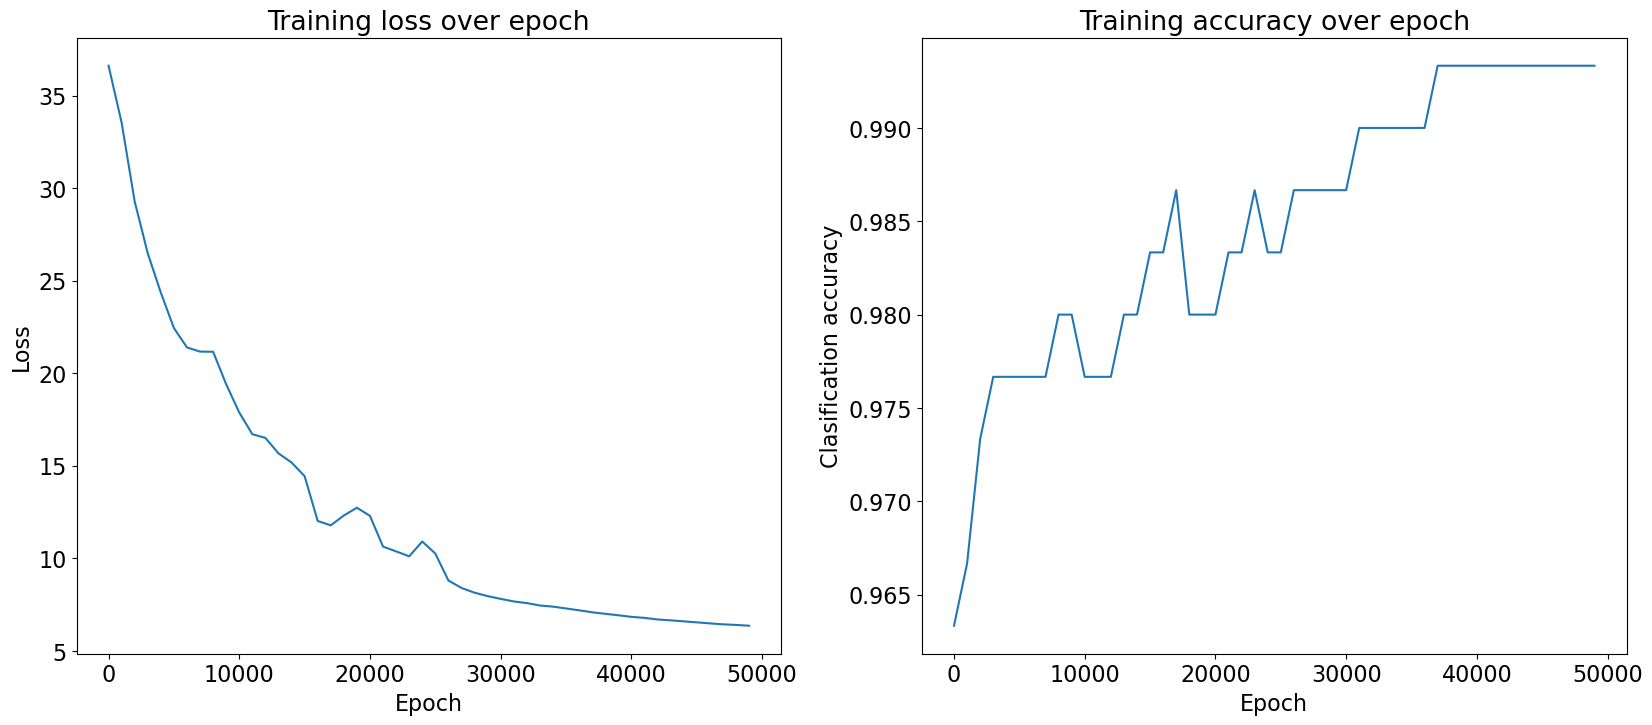

In [247]:
plt.subplot(1, 2, 1)
plt.plot(np.arange(len(stats['loss_history'])) * 1000, stats['loss_history'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training loss over epoch')
plt.subplot(1, 2, 2)
plt.plot(np.arange(len(stats['train_acc_history'])) * 1000, stats['train_acc_history'])
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.title('Training accuracy over epoch')
plt.gcf().set_size_inches(20, 8)

Text(0.5, 1.0, 'Decision Boundary: Hidden layer dimension (10, 10)')

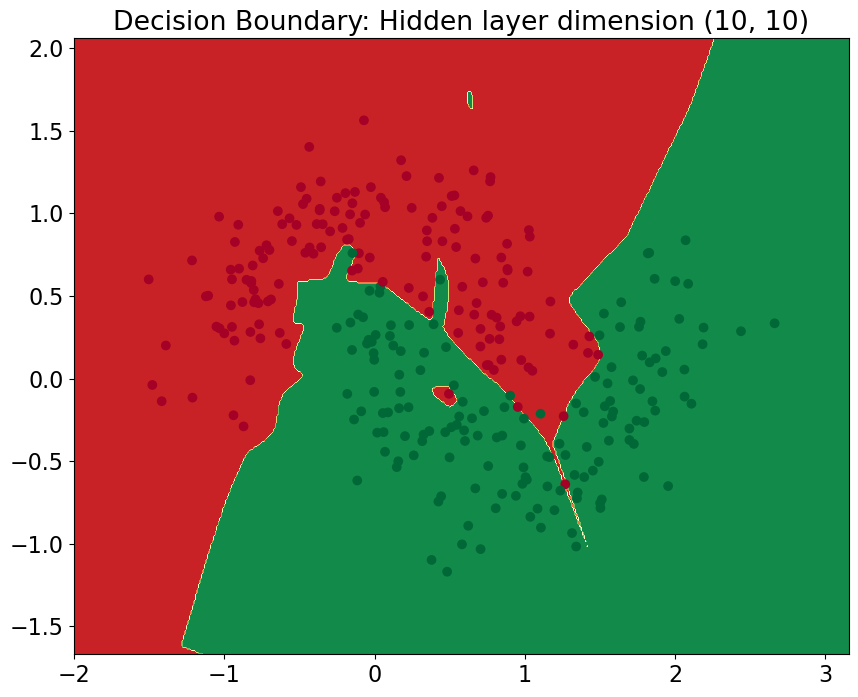

In [248]:
# Plot the decision boundary
plot_decision_boundary(lambda x: model.predict(x), X_train, y_train)
plt.title(f"Decision Boundary: Hidden layer dimension {nn_hdim1, nn_hdim2}")

### Play with your networks
#### Capacity
Change the numbers of nodes in hidden layers as follows, and plot decision boundaries: (1,1), (2,2), (3,3), (4,4), (5,5), (20,20), (50,50) where the first and second elements are the numbers of nodes in the first and second hidden layers, respectively.

Learning NN: Hidden layer dimension (1, 1) ... done
Learning NN: Hidden layer dimension (2, 2) ... done
Learning NN: Hidden layer dimension (3, 3) ... done
Learning NN: Hidden layer dimension (4, 4) ... done
Learning NN: Hidden layer dimension (5, 5) ... done
Learning NN: Hidden layer dimension (20, 20) ... done
Learning NN: Hidden layer dimension (50, 50) ... done


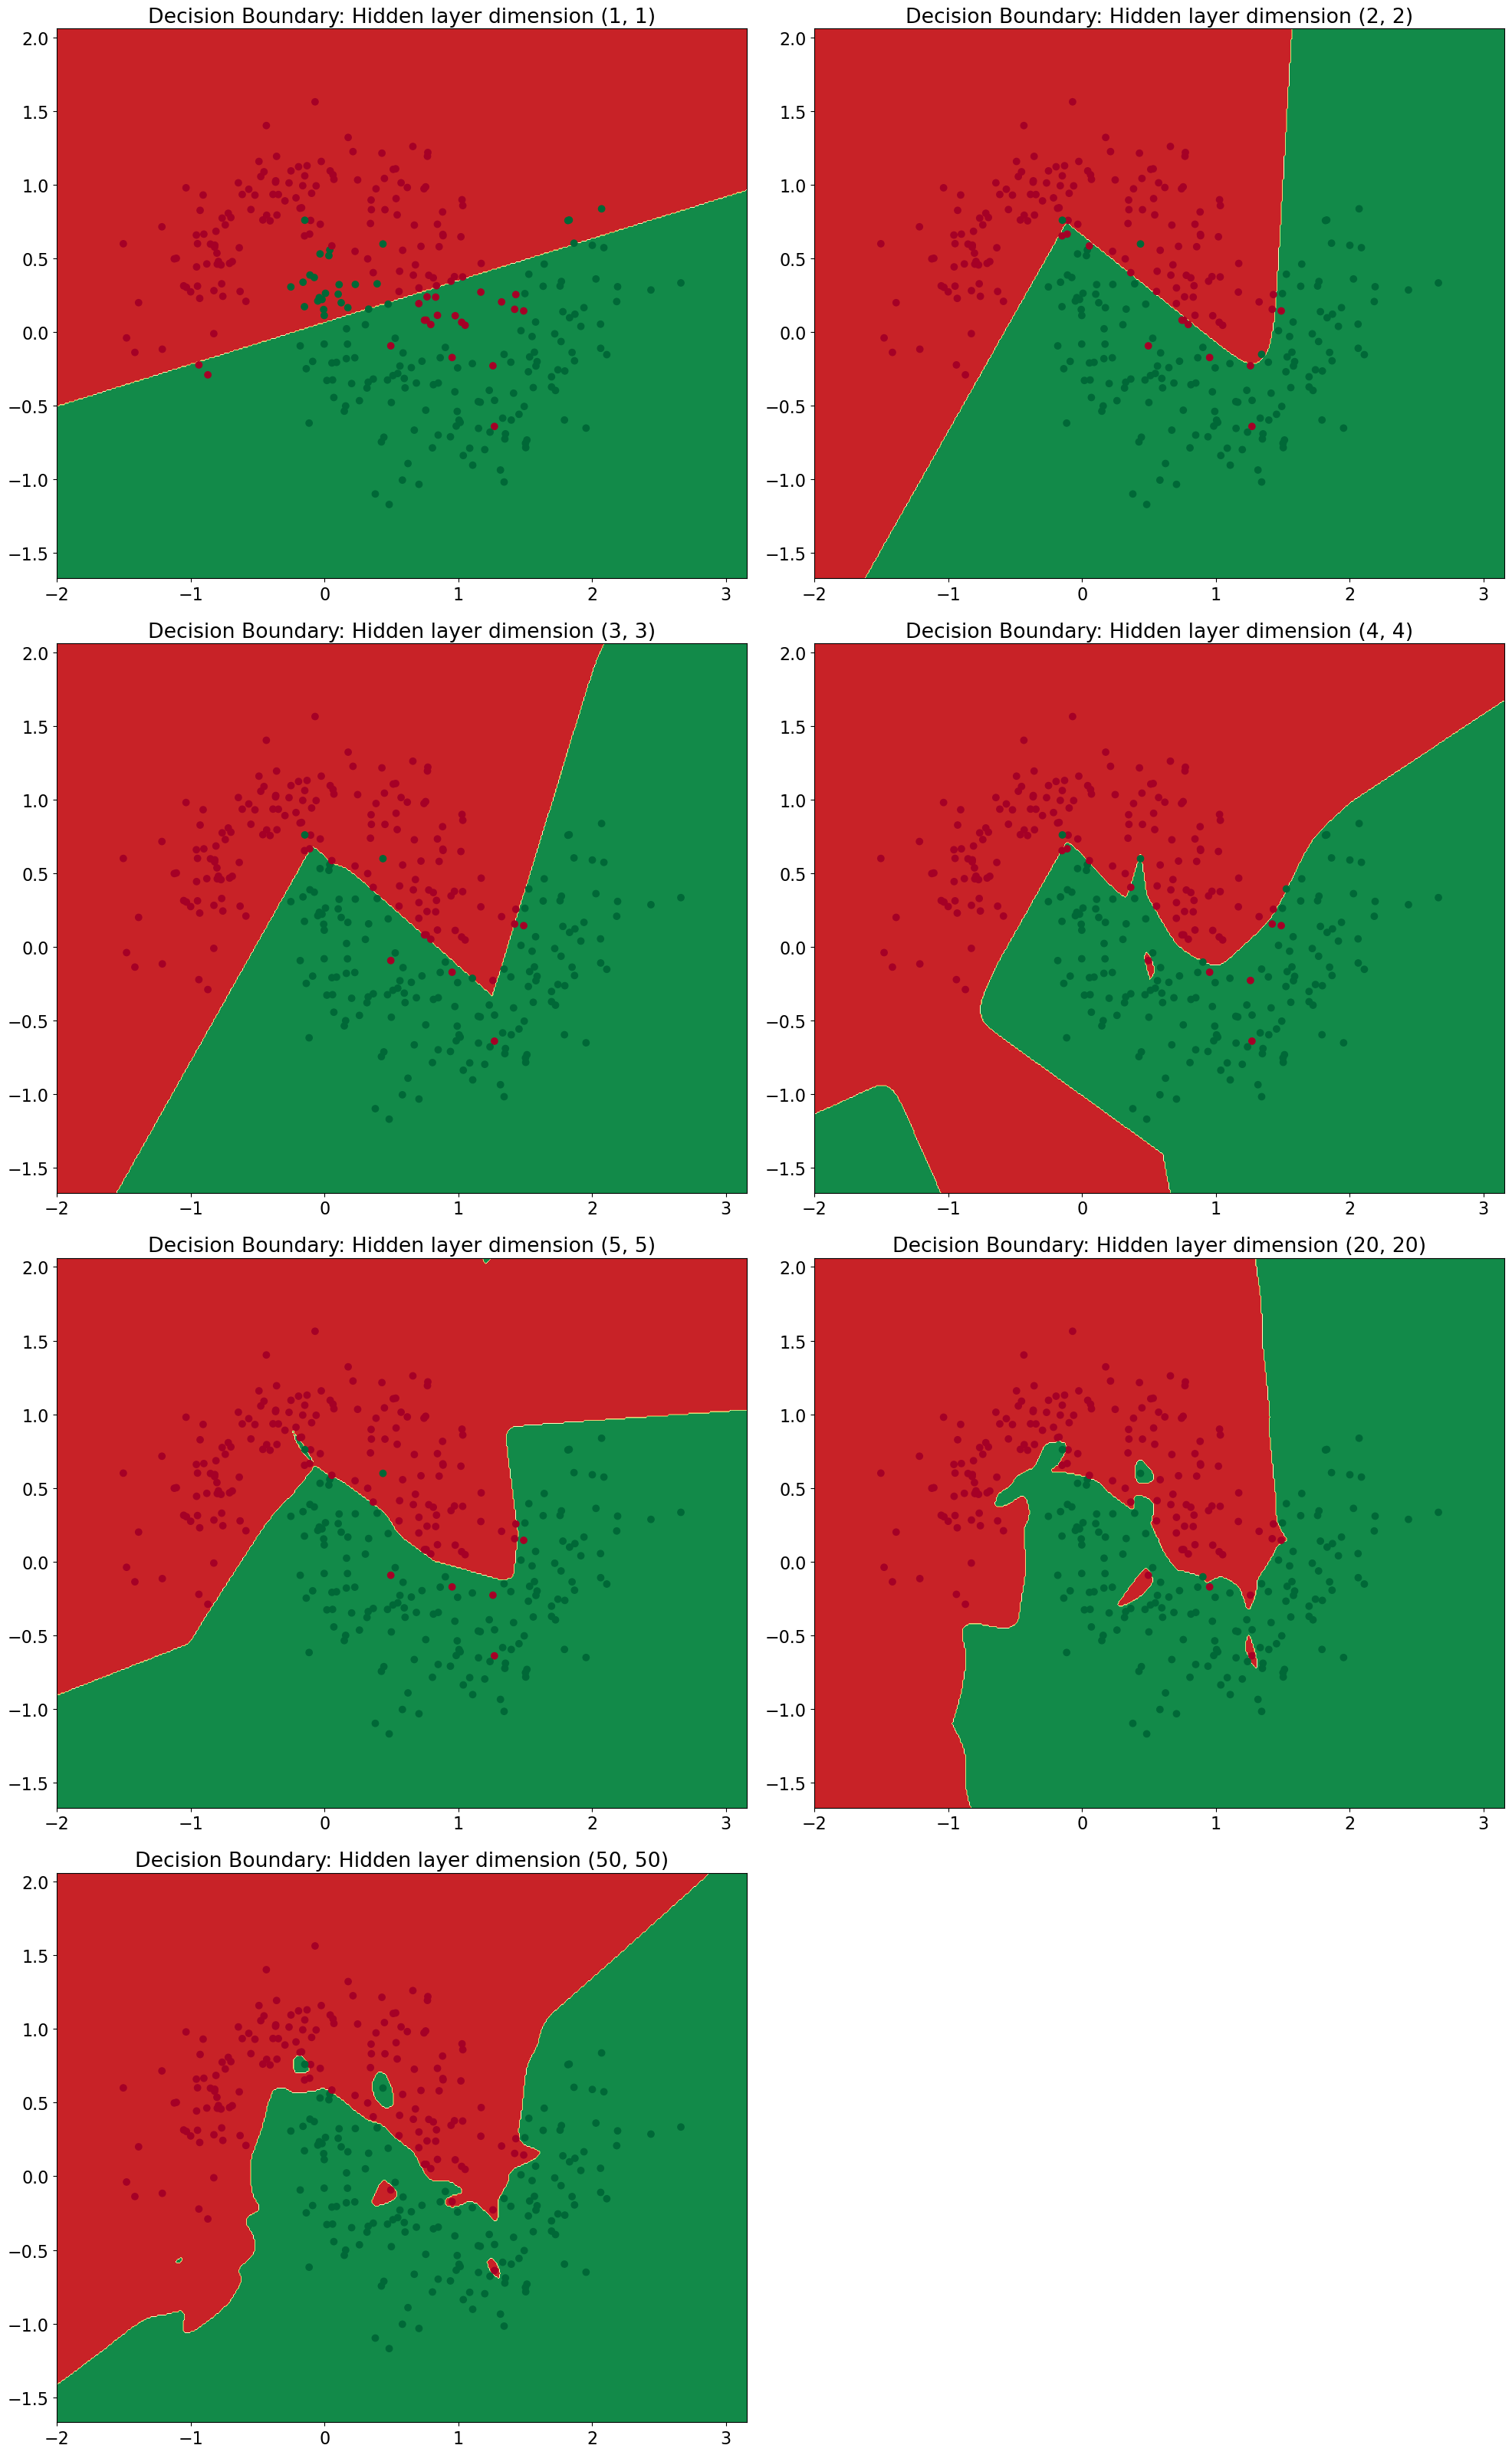

In [249]:
np.random.seed(0)

nn_input_dim = 2
nn_output_dim = 1
lr = 0.001 
epoch = 50000

hidden_layer_dimensions = [1, 2, 3, 4, 5, 20, 50]
for i, nn_hdim in enumerate(hidden_layer_dimensions):
    plt.subplot(5, 2, i+1)
    plt.title(f"Decision Boundary: Hidden layer dimension {nn_hdim, nn_hdim}")
    model = NeuralNetwork(nn_input_dim, nn_hdim, nn_hdim, nn_output_dim, init="random")      
    stats = model.train(X_train, y_train, learning_rate=lr, epoch=epoch,  L2_norm=0.0, print_loss=False)
    plot_decision_boundary(lambda x: model.predict(x), X_train, y_train)
    print(f"Learning NN: Hidden layer dimension {nn_hdim, nn_hdim} ... done")

plt.gcf().set_size_inches(20, 40)
plt.tight_layout()
plt.show()

#### Regularization
Adjust the regularization parameter $\lambda$ as follows, and plot decision boundaries: \[0, 1e-2, 1e-1, 1\].

Learning NN: Regularization 0 ... done
Learning NN: Regularization 0.01 ... done
Learning NN: Regularization 0.1 ... done
Learning NN: Regularization 1 ... done


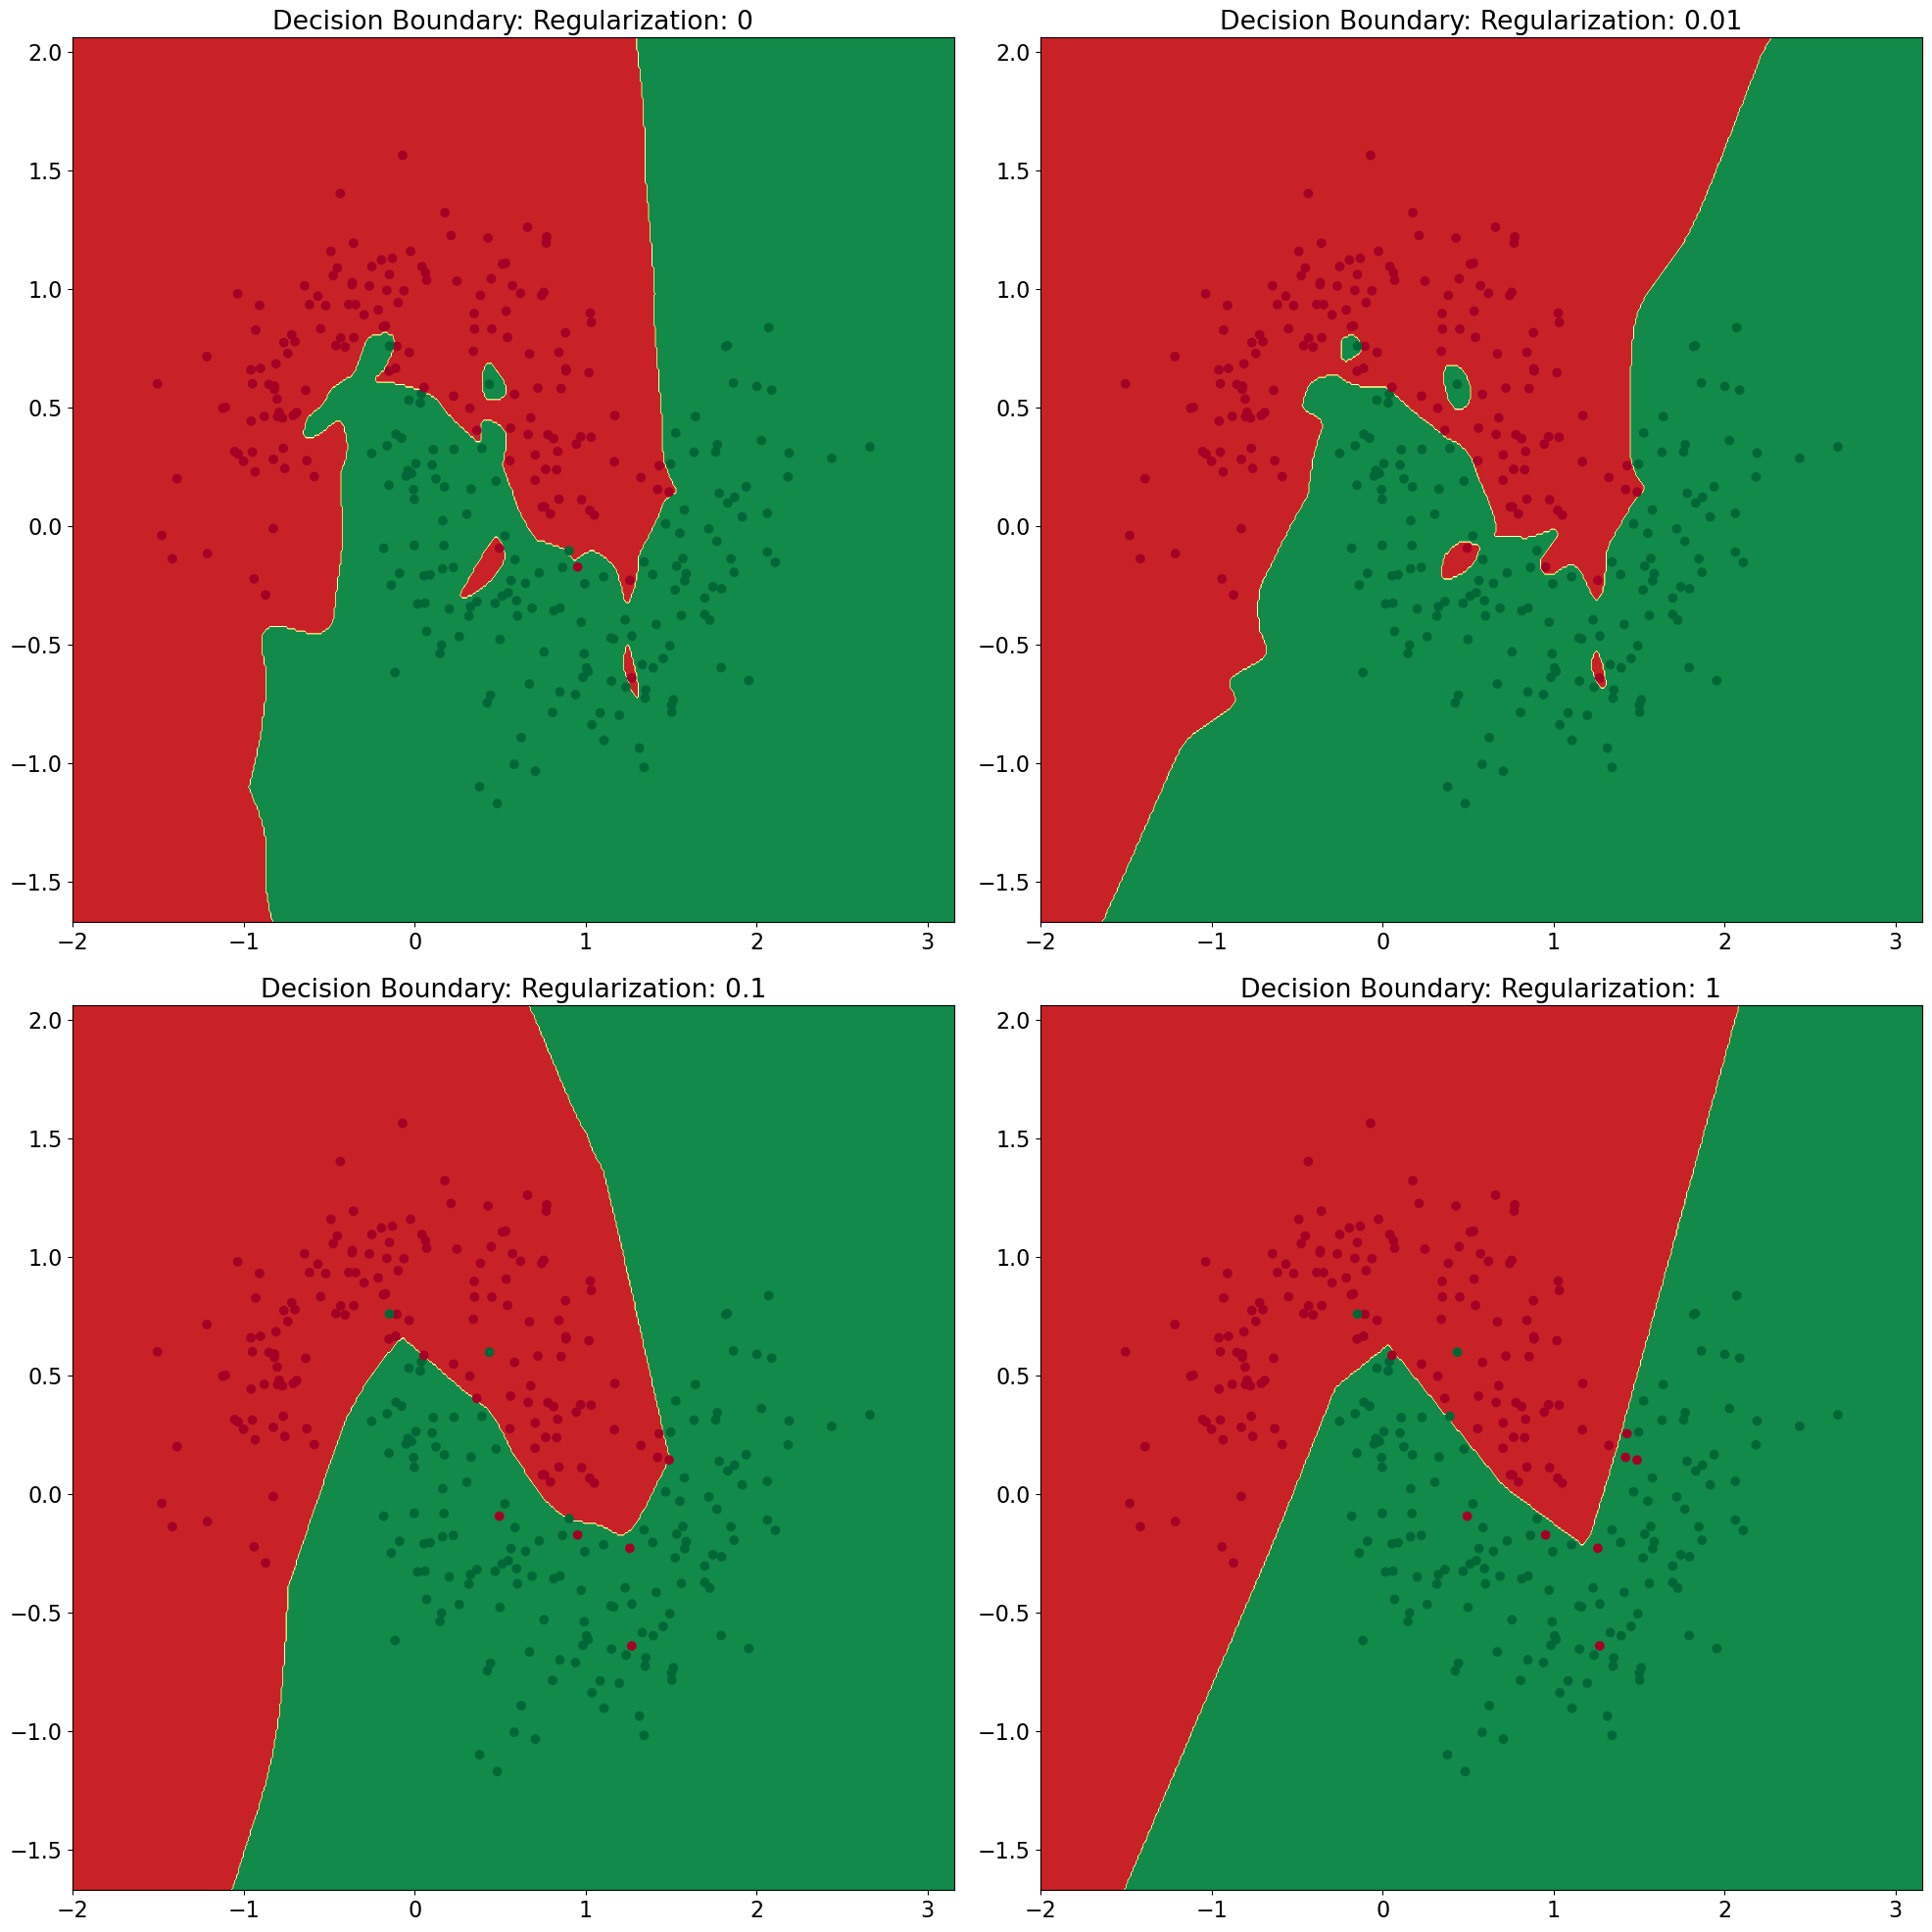

In [250]:
np.random.seed(0)

nn_input_dim = 2
nn_hdim = 20
nn_output_dim = 1
lr = 0.001 
epoch = 50000


L2_norm_list = [0, 1e-2, 1e-1, 1]
for i, L2_norm in enumerate(L2_norm_list):
    plt.subplot(2, 2, i+1)
    plt.title(f"Decision Boundary: Regularization: {L2_norm}")
    model = NeuralNetwork(nn_input_dim, nn_hdim, nn_hdim, nn_output_dim, init="random")      
    stats = model.train(X_train, y_train, learning_rate=lr, L2_norm=L2_norm, epoch=epoch, print_loss=False)
    plot_decision_boundary(lambda x: model.predict(x), X_train, y_train)
    print(f"Learning NN: Regularization {L2_norm} ... done")
    
plt.gcf().set_size_inches(20, 20)
plt.tight_layout()
plt.show()

### P3. Analysis and discussion (20 points)

Your answer must include.....

- Explanation of your implementation for a multilayer perceptron in both approaches (flat and modular codes)
- Random initialization vs Constant initialization
- Relationship between the number of hidden layers and decision boundary.
- The effect of regularization with respect to the performance.
- The effect of learning rate with respect to the performance.
- Analysis of the above results 

For analysis and discussion, you can exploit all functions you've written or make your own functions (or scripts).

---

## 1.Explanation of your implementation for multilayer perceptron in both approaches (flat and modular codes) ##



### Flat code ###
먼저 ReLu, tanh, sigmoid에 해당하는 함수를 구성한다. 

- ReLU = max(0,x) : 0보다 작으면 0을 출력, 0보다 크면 x를 출력한다
- anh(x) : 내장되어 있는 tanh함수를 사용한다
- simoid = 0보다 클 경우 1/(1+exp(-x)), 0보다 작으면 exp(x)/(1+exp(x))로 설정한다. 이는 overflow를 막기 위함이다.

**1. forward propagation**

self.model에 저장되어 있는 W, b를 이용하여 input X를 받아 output인 y_hat을 출력한다. 이는 다음과 같다.
 > $H_1 = X \cdot W_1 + b_1$   
 > $z_1 = ReLU(H_1)$  
 > $H_2 = z_1 \cdot W_2 + b_2$   
 > $z_2 = tanh(H_2)$   
 > $H_3 = z_2 \cdot W_3 + b_3$   
 > $\hat y = \sigma(H_3)$ 
- 이렇게 총 3개의 hidden layer로 구성된 CNN임을 알 수 있다.
- exp함수를 쓸 때 input값이 너무 크거나 작으면 overflow가 발생할 수 있기 때문에, input value가 0보다 클때와 작을 때를 나누어 sigmoid를 구성한다. negative일때의 식도 exp로 나누게 되면 positive일 때와 동일하다.
- forward_propagation을 통해 도출한 y_hat을 비롯하여 다른 coefficient 값을 cache dictionary에 저장하고, 이를 back_propagation에서도 사용한다.

**2. back_propagation**

forward_propagtion을 통해 계산하여 저장한 coefficient 와 y_hat을 그대로 사용하여 gradient decent를 이용해 upstream gradient와 local gradient를 곱하여  output layer에서부터 input layer로 반대로 계산한다.

- output layer
> $\frac{dL}{d\hat{y}} = -\frac{y}{\hat{y}}+\frac{1-y}{1-\hat{y}}$
>
- 3-hidden layer
> $\frac{d\hat{y}}{dh3} =\frac{dL}{d\hat{y}}(\hat{y} - \hat{y}^2) $
>
> $\frac{dL}{db3}=\frac{dL}{dh3}\frac{dh3}{db3}=\sum_{i=1}^{N}(\frac{dL}{dh3})_N$
>
> $\frac{dL}{dW3}=\frac{dL}{dh3}\frac{dh3}{dW3} + \frac{dL_{L2}}{dW3}=z2^T\frac{dL}{dh3}+2  \lambda  W3$ 
>
- 2-hidden layer
> $\frac{dL}{dz2}=\frac{dL}{dh3}\frac{dh3}{dz2}=\frac{dL}{dh3} W3^T$
>
> $\frac{dL}{dh2}=\frac{dL}{dz2}\frac{dz2}{dh2}=\frac{dL}{dz2}(1-(z2)^2)$
>
> $\frac{dL}{db2}=\frac{dL}{dh2}\frac{dh2}{db2}=\sum_{i=1}^{N}(\frac{dL}{dh2})_N$
>
> $\frac{dL}{dW2}=\frac{dL}{dh2}\frac{dh2}{dW2} + \frac{dL_{L2}}{dW2}=z1^T\frac{dL}{dh2}+2  \lambda \cdot W2$ 
>
> $\frac{dL}{dz1}=\frac{dL}{dh2}\frac{dh2}{dz1}=\frac{dL}{dh2} W2^T$
>
- 1-hidden layer
> $\frac{dL}{dh1}=\frac{dL}{dz1}\frac{dz1}{dh1}=\frac{dL}{dz1}\text{L}{[z>0]}$
>
> $\frac{dL}{dW1}=\frac{dL}{dh1}\frac{dh1}{dW1} + \frac{dL_{L2}}{dW1}=X^T\frac{dL}{dh1}+2  \lambda  W1$ 
>
> $\frac{dL}{db1}=\frac{dL}{dh1}\frac{dh1}{db1}=\sum_{i=1}^{N}(\frac{dL}{dh1})_N$

**3. compute loss(Binary Cross Entropy Loss)**
- self.model을 통해 불러온 coefficient 값들을 통해 loss function을 구하고 이를 sum하여 total loss를 계산한다.
 > $L = -y\log \hat{y} -(1-y)\log(1-\hat{y})$
 > $L_{total} = \sum_{i=1}^N{ (-y^{(i)}\log \hat{y}^{(i)} -(1-y^{(i)})\log(1-\hat{y}^{(i)})) }+ \lambda \|W\|^2 $  
- total loss를 계산한 다음 lamda와 sum of L2 normalization을 더해주어 regularizatino을 진행한다.

**4. train**
- for문을 이용하여 위의 과정을 반복하는데, epoch 1회당 forward와 back propagatino을 진행하여 weight와 bias가 업데이트된다. 
- epoch를 1000회 실행할 때마다 Loss값을 print하며, 이때의 prediction data, training accuracy, loss history를 저장한다. 

**5 prediction**
- predict 함수를 통해 input X를 forward propagation을 진행한 결과를 sign function을 이용하여 0 또는 1의 값을 출력해 accuracy를 계산한다.

### Modular code ###
- 대부분의 code의 구성이 flat과 같으나, 각각의 forward, back propagation 과정을 따로 따로 분리시켜 하나의 module로 구성하고 이를 output 을 계산할 때 한번에 연결하여 network를 구성한다. 
- 따라서, layer의 adaptation이 용이하다고 볼 수 있다. flat code의 경우에는 layer가 추가되면, forward와 backpropgation 코드를 새로 짜야 하지만, modular code의 경우에는 추가된 module의 forward, backward를 작성한 다음, 연결하기 하면 되기 떄문이다. 
- 이와 같은 이점을 이용하여 layer의 수가 많거나 복잡한 model의 경우에는 modular code를 쓰는것이 더 낫고, layer의 수가 적거나 한 layer에 많은 coefficient가 존재하고 한번에 여러개의 functino이 연결된 경우에는 flat ode가 더 낫다.



**Linear module**
> $out=WX+b$    
> $dx = dout(w^T)$,  
> $dw = (x^T)dout$,  
> $db = \sum_{i=1}^{N}({dout})_N$

**ReLU**
> $out=ReLU(x)$,  
> $dx = dout\cdot\text{L}[x>0]$

**tanh**
> $out=tanh(x)$,  
> $dx = dout(1-out^2)$

**Sigmoid**
> $out=sigmoid(x)$,  
> $dx = dout(out-out^2)$
>

**SigmoidWithBCELoss**
> $\hat{y} = sigmoid(x)$,  
> $Loss = \sum_{i=1}^{N}[{-y\log{\hat{y}}} - (1-\hat{y})\log{(1-\hat{y})}]$
> $dx = -\frac{y}{\hat{y}}+\frac{1-y}{1-\hat{y}} (\text{if dout is None}) $,  
>$dx = dout(\hat{y} - y) (\text{else}) $
>


***NeuralNetwork_module***
- foward  :  
각 모듈의 forward함수를 불러와 사용한다. 모듈의 input값을 self.model을 이용하여 불러온 다음, 결과 값을 다른 model에 저장하고, 이를 또 다른 module의 input값으로 사용하여 convolutional network model을 구성한다. 
- 따라서  
input - Linear - ReLU - Linear - tanh - Linear - sigmoid- output - BCELoss 순으로 module을 연결하여 model을 구성한다.
>
- backward :  
flat에서와 마찬가지로, output 부터 input까지 반대로 진행되며, 각 모듈의 backward함수를 불러와 gradient를 구하고, 이를 또 다른 module의 input으로 사용하여 계산하다. 
- 따라서  
BCELoss - output - sigmoid - Linear - tanh - Linear - ReLU - Linear - input 순으로 backward를 구성한다.

**train**
- flat에서와 동일하게 epoch 마다 forward와 backward를 진행하여 coefficient를 update한다. 또한 L2 regularization term을 loss summation에 더해준다.

- flat에서와 같이 epoch가 1000씩 진행됨에 따라 loss 값을 저장하여 출력하고, 이떄의 prediction data, training accuracy, loss history를 저장한다.

**prediction**
- 마찬가지로, forward함수를 사용하여 X의 prediction 값을 구하고 이를 sign함수를 통해 0또는 1로 출력하여 prediction data를 도출한다


## 2.Random initialization vs Constant initialization ##

Text(0.5, 1.0, 'Decision Boundary: Hidden layer dimension (10, 10)')

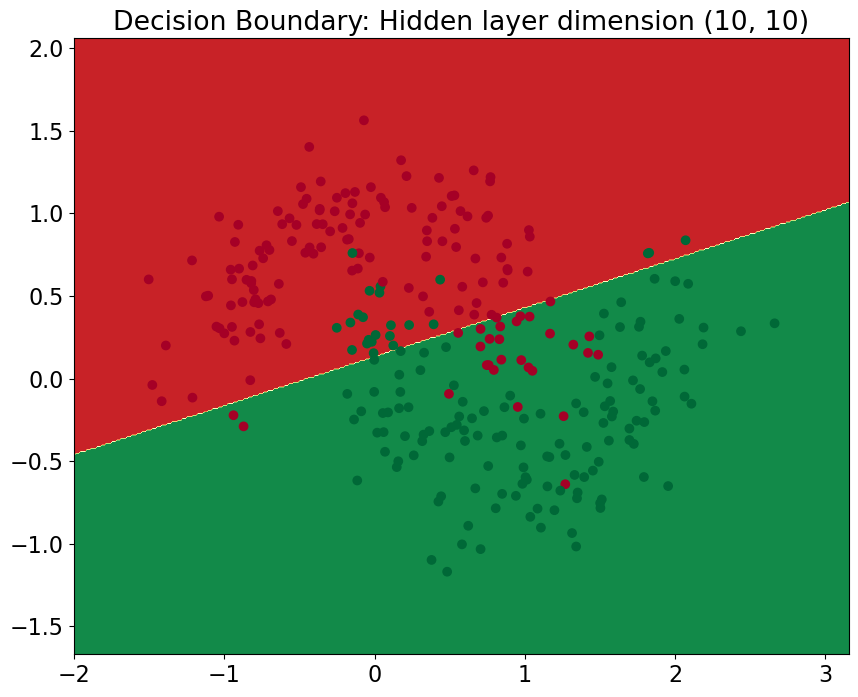

In [251]:
np.random.seed(0)
X_train, y_train = sklearn.datasets.make_moons(300, noise = 0.25)

np.random.seed(0)

nn_input_dim = 2
nn_output_dim = 1
nn_hdim1 = 10
nn_hdim2 = 10
lr = 0.001 
L2_norm = 0.001
epoch = 50000

model = NeuralNetwork(nn_input_dim, nn_hdim1, nn_hdim2, nn_output_dim, init="constant")
stats = model.train(X_train, y_train, learning_rate=lr, L2_norm=L2_norm, epoch=epoch, print_loss=False)

plot_decision_boundary(lambda x: model.predict(x), X_train, y_train)
plt.title(f"Decision Boundary: Hidden layer dimension {nn_hdim1, nn_hdim2}")


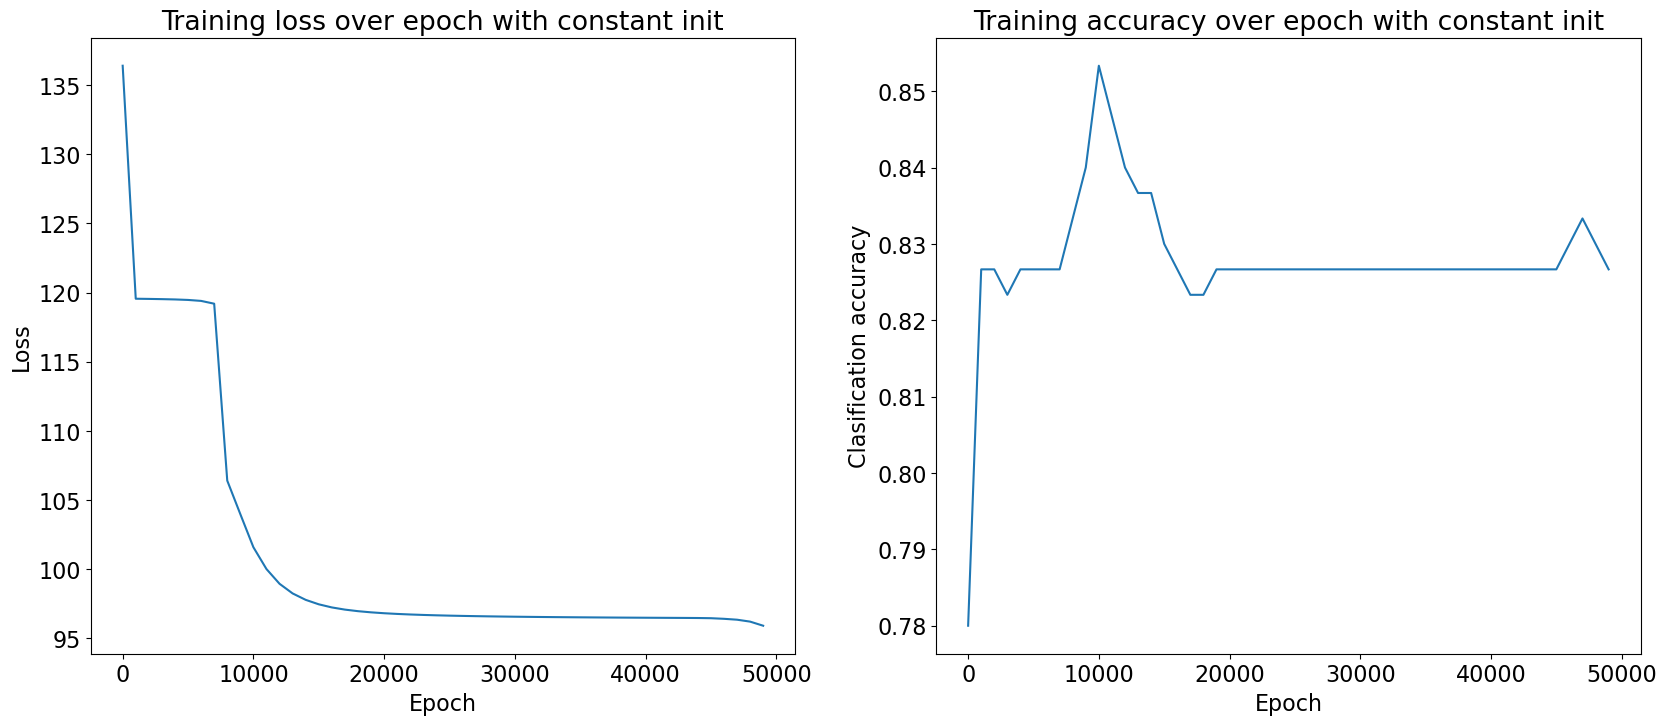

In [252]:
plt.subplot(1, 2, 1)
plt.plot(np.arange(len(stats['loss_history'])) * 1000, stats['loss_history'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training loss over epoch with constant init')
plt.subplot(1, 2, 2)
plt.plot(np.arange(len(stats['train_acc_history'])) * 1000, stats['train_acc_history'])
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.title('Training accuracy over epoch with constant init')
plt.gcf().set_size_inches(20, 8)

위의 결과는 
model = NeuralNetwork(nn_input_dim, nn_hdim1, nn_hdim2, nn_output_dim, init="constant")만을 바꾸고 P1를 실행한 결과이다. 모든 weight의 초기값을 동일한 constant로 변경한 후 실행한 경우 모든 neuron이 동일한 output 값을 출력한다. 이는 backpropagation을 실행할 때 모든 gradient가 같은 값으로 나온다는 뜻이기 때문에 update역시 같은 속도로 진행된다. 이때문에 마치 한 방향의 neuron만이 존재하는 것처럼 역할을 하며, single neuron network가 된다. noise를 제외하면 constant한 accuracy 값을 나타내는데, iteration을 진행하여도 accuracy가 향상되지 않는 것을 알 수 있다. 이는 모두 같은 값의 coefficient로 시작했기 때문에 동일한 gradient로 학습하여 decision boundary 또한 linear한 결과를 나타낸다. 따라서, constant initialization 을 진행하게 되면, 학습능력이 떨어지는 결과를 확인할 수 있다. random한 initializtion을 확인해보면, 각각의 neuron이 다른 coefficient로 출발하여, 다른 gradient를 출력하고 이를 training하면서 loss를 줄이고, accuracy가 향상되는 모습을 보인다. 하지만, sigmoid의 특성상 overflow가 발생할 수 있고, 이에 따라 noise가 발생할 가능성이 크다.


## 3.Relationship between number of hidden layers and decision boundary ##

Learning NN: Hidden layer dimension (1, 1) ... done
Learning NN: Hidden layer dimension (2, 2) ... done
Learning NN: Hidden layer dimension (3, 3) ... done
Learning NN: Hidden layer dimension (4, 4) ... done
Learning NN: Hidden layer dimension (5, 5) ... done
Learning NN: Hidden layer dimension (20, 20) ... done
Learning NN: Hidden layer dimension (50, 50) ... done


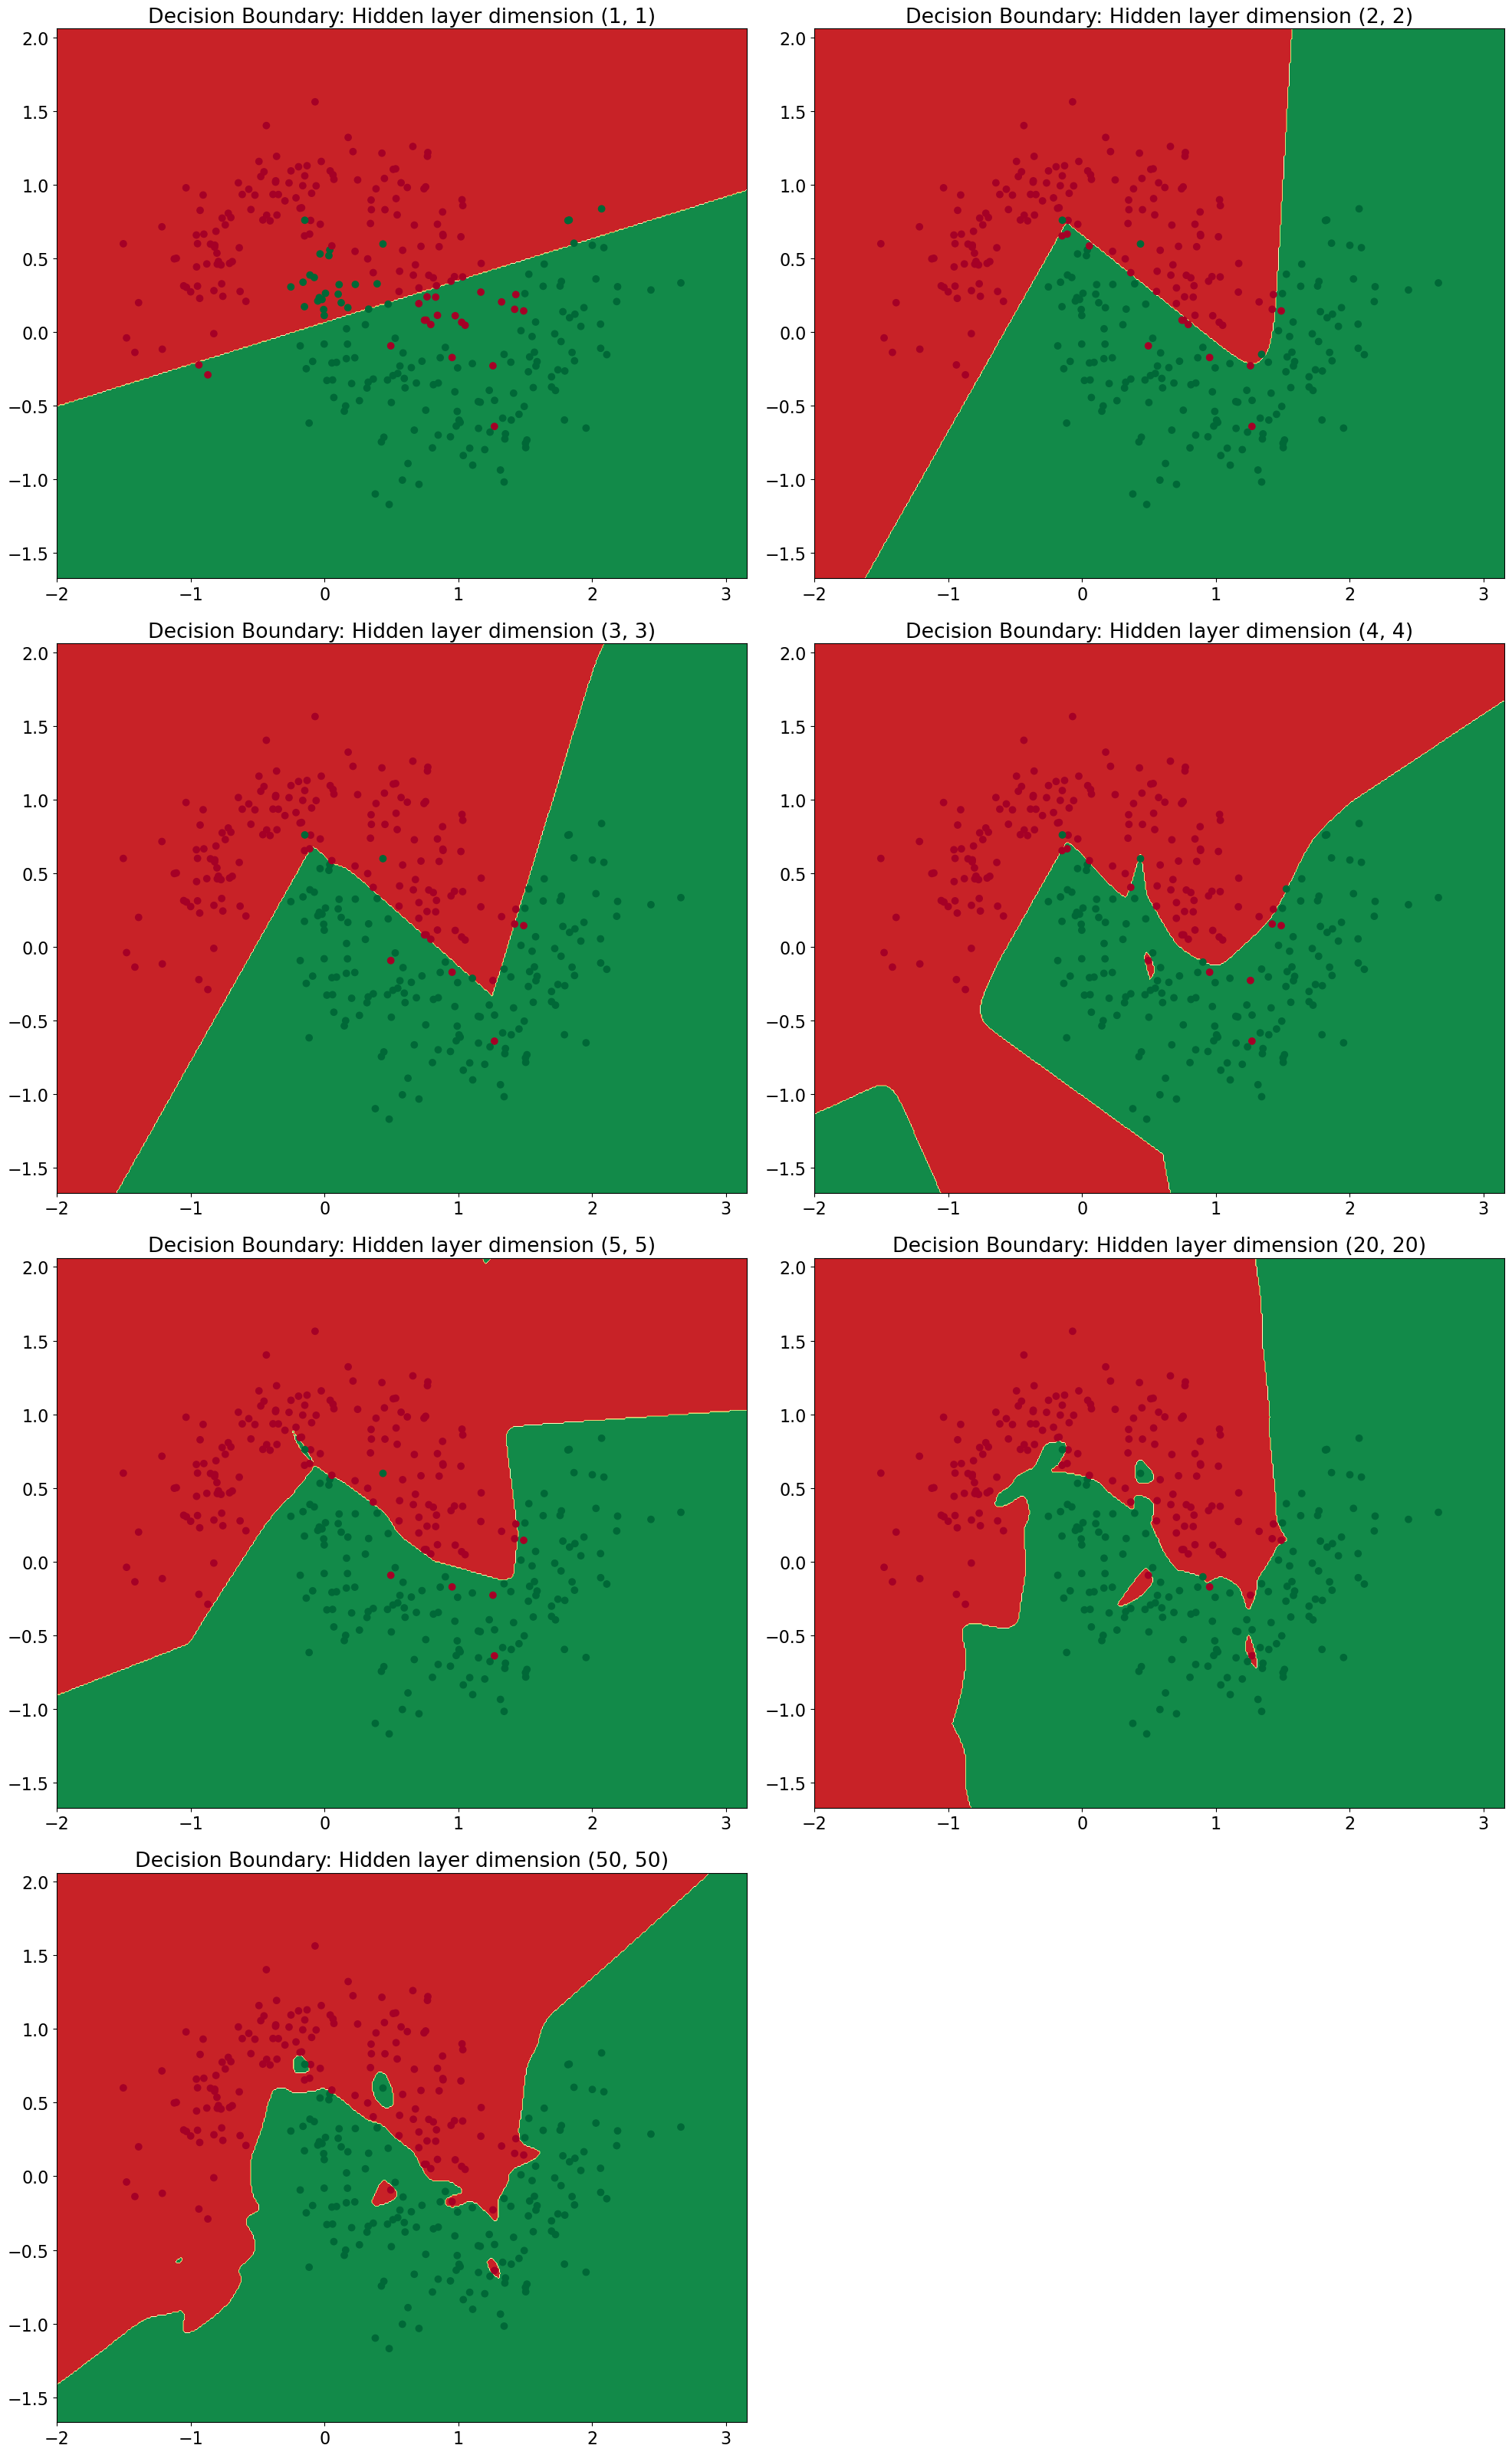

In [185]:
np.random.seed(0)

nn_input_dim = 2
nn_output_dim = 1
lr = 0.001 
epoch = 50000

hidden_layer_dimensions = [1, 2, 3, 4, 5, 20, 50]
for i, nn_hdim in enumerate(hidden_layer_dimensions):
    plt.subplot(5, 2, i+1)
    plt.title(f"Decision Boundary: Hidden layer dimension {nn_hdim, nn_hdim}")
    model = NeuralNetwork(nn_input_dim, nn_hdim, nn_hdim, nn_output_dim, init="random")      
    stats = model.train(X_train, y_train, learning_rate=lr, epoch=epoch,  L2_norm=0.0, print_loss=False)
    plot_decision_boundary(lambda x: model.predict(x), X_train, y_train)
    print(f"Learning NN: Hidden layer dimension {nn_hdim, nn_hdim} ... done")

plt.gcf().set_size_inches(20, 40)
plt.tight_layout()
plt.show()

- Capacity의 결과를 분석하면 다음과 같다.
hidden layer의 dimension 수가 증가함에 따라, decision boundary가 더욱 complex하고 non-polynomial해지는 것을 알 수 있다. 이는 overfitting이 발생하기 때문이다.
- hidden layer가 존재하지 않는 single-layer perceptron의 경우, paramatric한 problem을 해결하기에 용이하다. 하지만, non-linear하고 복잡한 모델을 수행할 수 없다.
- hidden layer가 다수 존재하는 complex한 perceptron의 경우 non-parametric한 problem을 해결하는데 용이하며, XOR과 같은 non-linear한 problem또한 해결가능하다. 하지만, layer 수가 너무 많아지게 되면, epoch가 증가함에 따라, activation function의 gradient 값이 너무 작거나 너무 커지게 되고, 이에 따라 overflow가 발생할 가능성이 크다. 또한, 너무 작은 수의 경우 0으로 인식되어 성능이 더이상 향상되지 않는 문제가 생긴다. 또한, 많은 수의 dimension을 계산해야하기 때문에 running speed또한 느리다는 단점이 있다.

## 4. The effect of regularization with respect to the performance. ##


In [253]:
np.random.seed(0)
X, y = sklearn.datasets.make_moons(400, noise = 0.25)
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0)

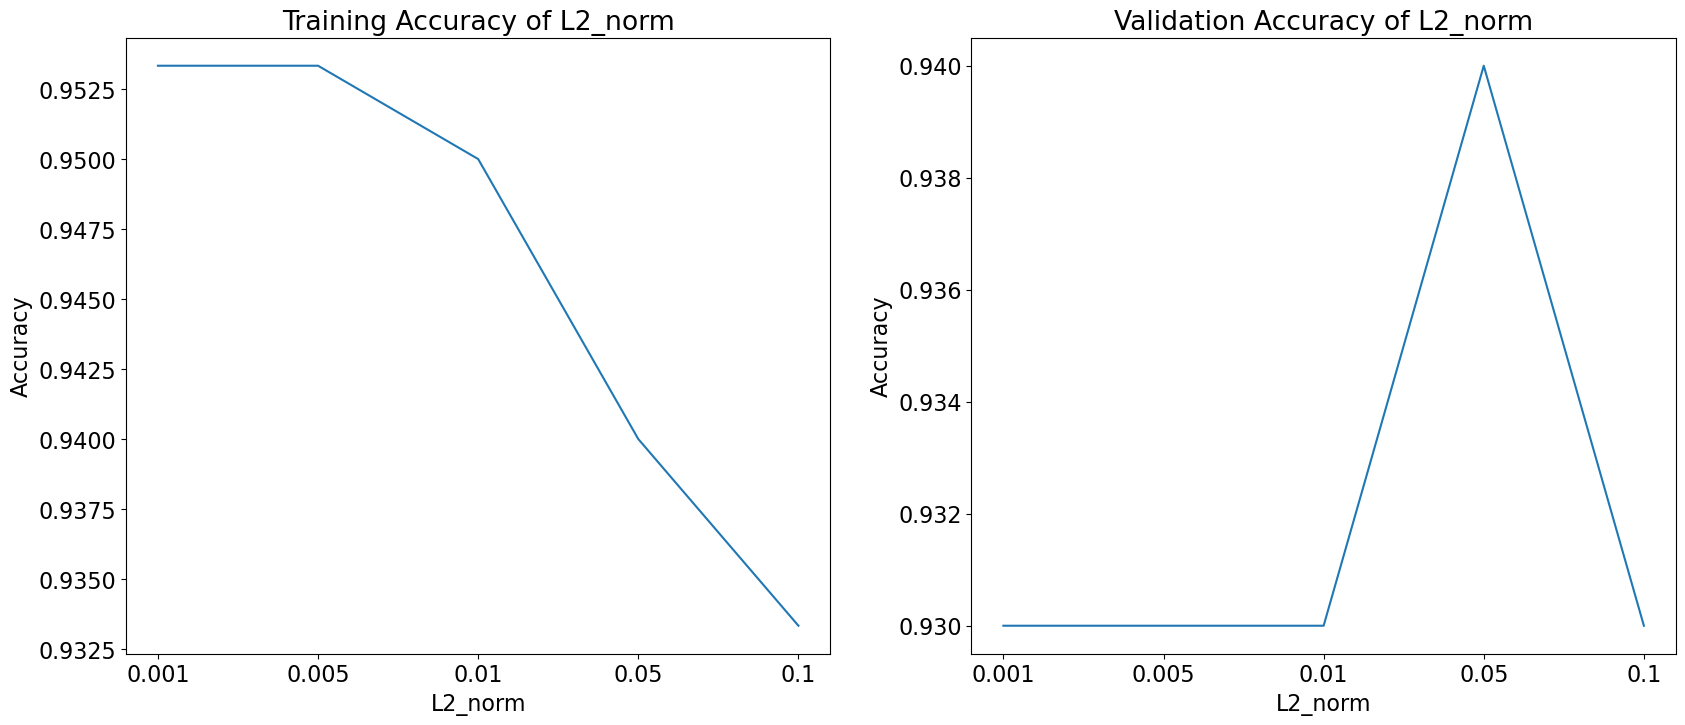

In [254]:

nn_input_dim = 2
nn_output_dim = 1
nn_hdim1 = 10
nn_hdim2 = 10
lr = 0.001 
L2 = [0.001, 0.005, 0.01, 0.05, 0.1]
epoch = 10000

reg_acc = []
reg_val = []
axis = ['0.001', '0.005', '0.01', '0.05', '0.1']

for L2_norm in L2 : 
    np.random.seed(0)
    model = NeuralNetwork(nn_input_dim, nn_hdim1, nn_hdim2, nn_output_dim, init="random")
    stats = model.train(X_train, y_train, X_val, y_val, learning_rate=lr, L2_norm=L2_norm, epoch=epoch, print_loss=False)
    reg_acc.append(stats['train_acc_history'][-1])
    reg_val.append(stats['val_acc_history'][-1])
    
plt.subplot(1, 2, 1)
plt.plot(axis, reg_acc)
plt.xlabel('L2_norm')
plt.ylabel('Accuracy')
plt.title('Training Accuracy of L2_norm')
plt.subplot(1, 2, 2)
plt.plot(axis, reg_val)
plt.xlabel('L2_norm')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy of L2_norm')
plt.gcf().set_size_inches(20, 8)



위의 결과는 regularization의 L2_norm lamda 값을 0.001, 0.005, 0.01, 0.05, 0.1로 했을 때의 training accuracy와 validation accuracy를 나타낸 그림이다. 너무 많은 iteration을 진행하게 되면 overflow가 발생할 수 있기 때문에 10000으로 줄인다음 진행하였다. 


결과 그래프를 보게되면, lamda의 값이 증가할수록, training accuracy는 감소하지만 validation accuracy는 향상되는 것을 알 수 있다. 이는 lamda값이 작아질수록, coplexity가 증가함에 따라 overfittin의 가능성을 배제할 수 없기 때문에, training data에만 fit한 model이 만들어지게 되고, validation에는 적합하지 않게 된다. 따라서, model의 training accuracy와 validation accuracy 둘간의 trade-off한 특성을 고려하여 적절한 lamda 값을 설정해야 performance를 향상시킬 수 있다.

## 5.The effect of learning rate with respect to the performance. ##

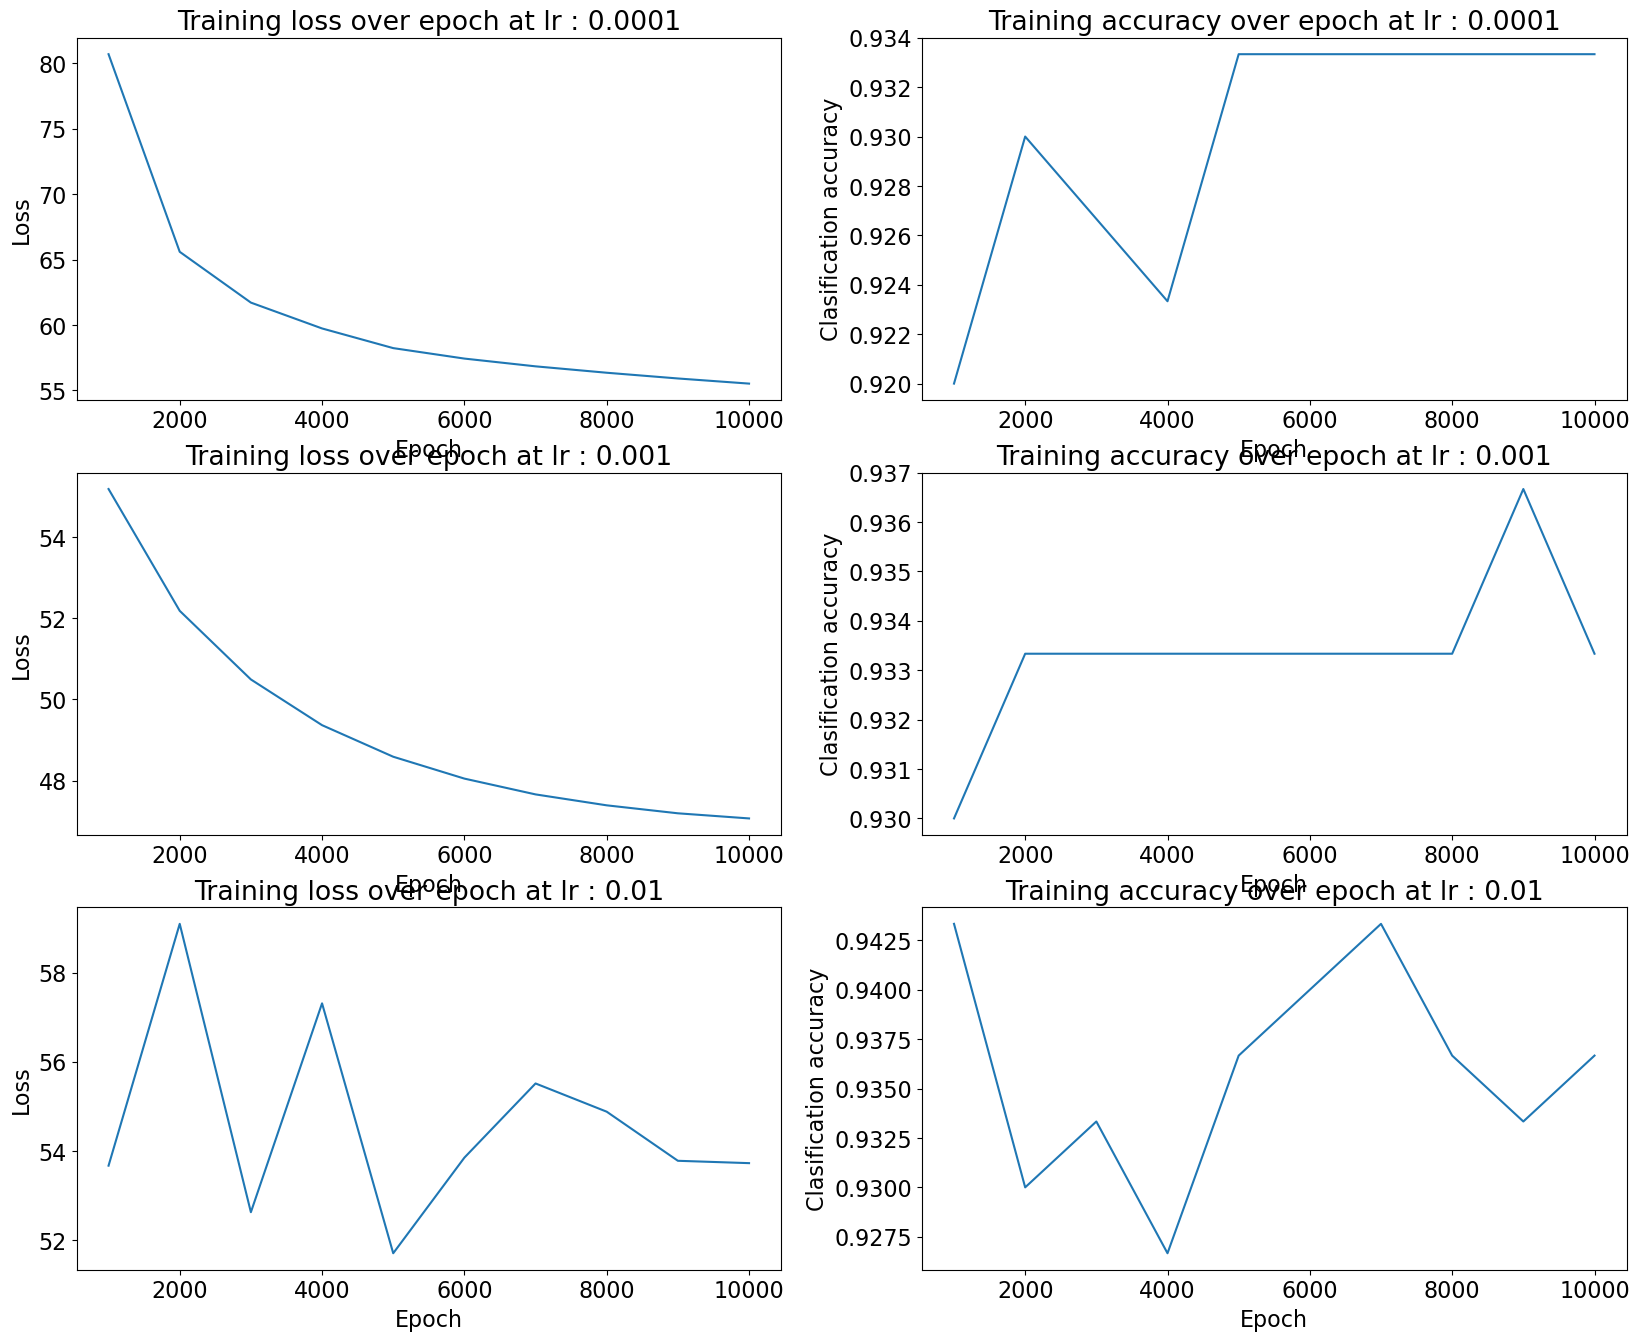

In [255]:

nn_input_dim = 2
nn_output_dim = 1
nn_hdim1 = 10
nn_hdim2 = 10
l = [0.0001, 0.001, 0.01]
L2 = 0.001
epoch = 10000

lr_loss = []
lr_acc = []

for lr in l : 
    np.random.seed(0)
    model = NeuralNetwork(nn_input_dim, nn_hdim1, nn_hdim2, nn_output_dim, init="random")
    stats = model.train(X_train, y_train, X_val, y_val, learning_rate=lr, L2_norm=L2_norm, epoch=epoch, print_loss=False)
    lr_loss.append(stats['loss_history'])
    lr_acc.append(stats['train_acc_history'])
    
plt.gcf().set_size_inches(20, 16)

for i in range(0,3) : 
    
    plt.subplot(3, 2, 2*(i)+1)
    plt.plot(np.arange(len(lr_loss[i])) * 1000 + 1000,lr_loss[i])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f"Training loss over epoch at lr : {l[i]}")
    
    plt.subplot(3, 2, 2*(i+1))
    plt.plot(np.arange(len(lr_acc[i])) * 1000+1000, lr_acc[i])
    plt.xlabel('Epoch')
    plt.ylabel('Clasification accuracy')
    plt.title(f"Training accuracy over epoch at lr : {l[i]}")
    
    
    
    

    
    

위의 결과는 Learning rate를 각각 0.0001, 0.001, 0.1, 즉 위 P1.1의 learning rate보다 높이고 낮추었을 때의 결과를 나타낸 모습이다. overflow를 방지하기 위해 위의 4번에서과 같이 epoch를 10000으로 줄이고 나타내었다. 
- learning rate = 0.0001 : 
learning rate가 너무 낮은 경우, update되는 gradient decent의 변화량이 너무 작아지기 때문에 training time이 커지게 된다. 또한, 너무 적은 변화량 때문에 local minimum에 빠지게 되는 현상이 발생해 performance가 감소하는 결과를 나타낸다.  이는 수업시간에 배운 gradient descent 값에 moment 값을 더해주어 local minimum을 빠져나가게 할 수 있다.

- learning rate = 0.1 : 
learning rate가 너무 큰 경우, update 되는 gradient descent의 변화량이 너무 크기 때문에 overshooting이 발생할 수 있고, converge하지 않고 diverge할 가능성이 커진다. 때문에, los값이 decay하지 않고 증가와 감소를 반복할 가능성이 높아져 performance는 오히려 감소하게 된다. 

- 따라서, 적절한 learning rate 값을 설정하는것이 performance 향상으로 이어진다. 

## 6.Analysis of the above results ##

이를 바탕으로 result를 분석하면 다음과 같다.

**P1 (Flat code)** 

nn_input_dim = 2, 
nn_output_dim = 1, 
nn_hdim1 = 10, 
nn_hdim2 = 10, 
l = 0.001, 
L2 = 0.001, 
epoch = 10000,  
과 같은 condition으로 setting하고, training을 진행하였다. 한번의 iteration(epoch)당 forward와 backward propagation을 한번씩 진행하여 coefficient를 update하면서 training 시켰는데, epoch가 1000씩 증가함에 따라 loss 또한 점점 감소하는 것을 알 수 있는데, 이와 함께 accuracy 또한 증가함을 알 수 있었다. 50000번의 iteration을 바탕으로 decision boundary 또한 생성해 보았는데, white area인 undecision boundary가 거의 없고, 대부분 sparse하게 split된 것을 알 수 있다. 이는 50000번의 iteration을 진행했기 때문에 이미 training set이 매우 complex한 model이 되어 overfitting의 가능성이 크다는 것을 뜻한다. 젤 윗부분에 나타난 logistic regression을 통해 나타난 decision boundary와는 달리 매우 non-polinomial한 모습을 보이는 것이 특징이다. 각 부분의 역할에 따른 performance의 결과는 위의 discussion에서 다루었기 때문에 넘거가도록 한다.

**P2 ( Modlar code) **

P1와 같은 conditin으로 진행했으며 결과 또한 거의 동일함을 알 수 있다. 앞에서도 설명햇듯이, modular code를 사용하게 되면, 새로운 module의 추가나 기존 모듈의 삭제가 용이하기 때문에 adaptation이 좋아 flexibility가 좋다는 장점이 있다. 추가적인 내용은 1번 discussion에서 확인할 수 있다.

**Capacity**

3번 discussion에서 설명했던것과 마찬가지로, hidden layer의 dimension이 증가할수록, decision boundary가 더 complex해지는 것을 알 수 있다. 이는 neuron의 수가 증가하기 때문에, 더욱 많은 decision 구간을 설정할 수 있고, 따라서 더 복잡한 모델이 만들어지는 것이다. 따라서, training data에 대한 accuracy는 0에 가까워 지지만, validation accuracy는 수업시간에서 배운대로 일정 term 이상에서는 exponential하게 감소하는 것을 알 수 있다. 따라서, 적절한 수의 layer을 설정하는 것 또한 CNN에서 중요하다는 것을 알 수 있다.

**Regularization**

4번 discussion에서 설명한 것과 같은데, lamda 값이 작을수록 complex한 모델이 생성되고, 이는 training 시에는 accuracy가 높으나 위의 dimension이 증가할 때의 문제와 마찬가지로 validation시에는 accuracy가 감소할 가능성이 있다. 따라서 traning accuracy와 validation accuracy간의 trade-off적인 특성을 고려하여 적절한 값의 lamda를 설정하는 것이 data training & test에 중요하다는 것을 알 수 있다.

## 조교님들께. ##

감사합니다. 한학기 동안 수고많으셨습니다.ㅜㅜ
project1의 ipynb의 파일을 제출하지 않고 조교님을 귀찮게 한 이창연이라고 합니다.. 다시 생각해봐도 너무 아쉬운 점수지만, 저의 부주의에 따른 결과라 생각하고 안고 가겠습니다. 모두들 행복한 연말 되세요!